In [0]:
#!pip install gdown
#!pip install tensorflow-gpu

#https://www.curiousily.com/posts/time-series-forecasting-with-lstms-using-tensorflow-2-and-keras-in-python/

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
%config InlineBackend.figure_format='retina'

print(tf.__version__)

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 16, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
#tf.random.set_seed(RANDOM_SEED) #for tf version 2.0
tf.random.set_random_seed(RANDOM_SEED) #for tf version 1.15

1.15.0


In [0]:
time = np.arange(0, 100, 0.1)
sin = np.sin(time) + np.random.normal(scale=0.5, size=len(time))

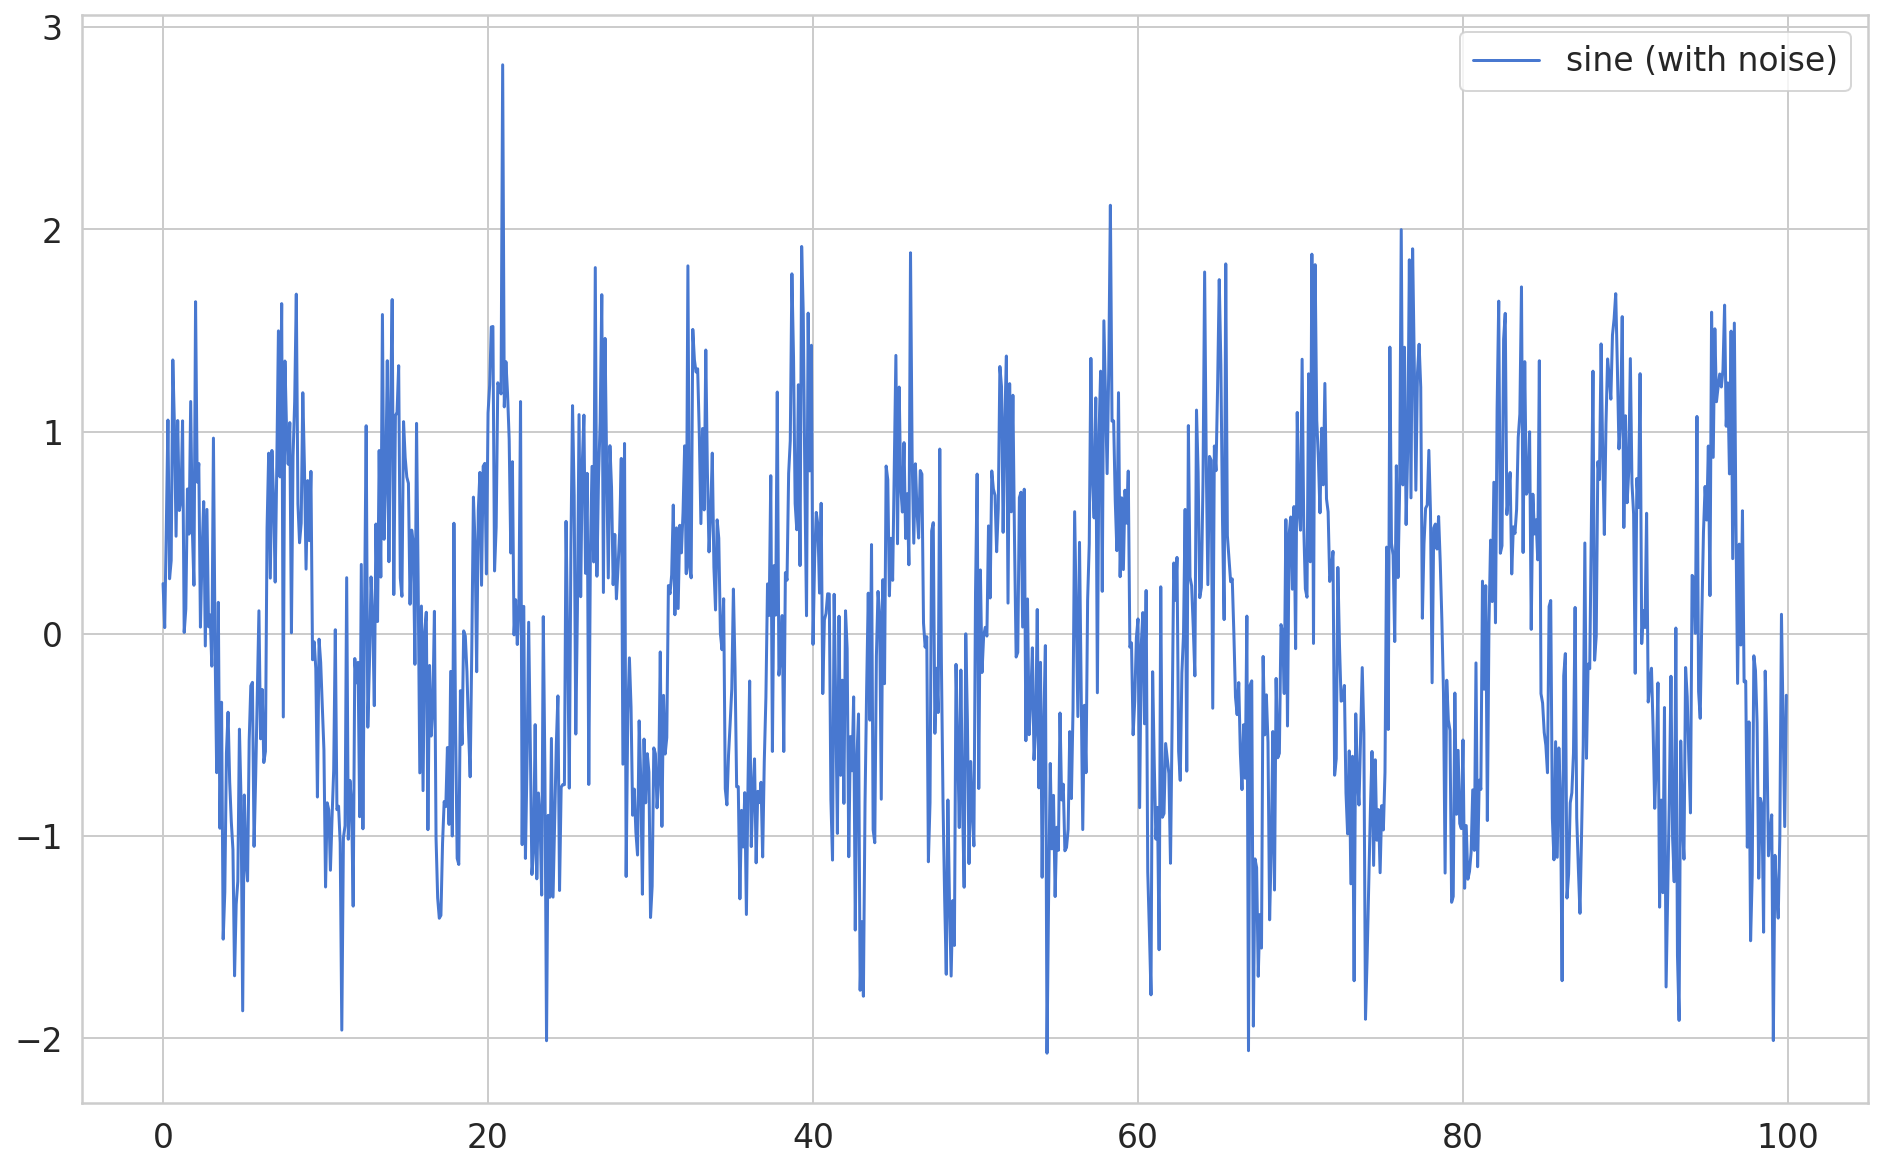

In [4]:
plt.plot(time, sin, label='sine (with noise)');
plt.legend();

# Data Preprocessing

In [5]:
df = pd.DataFrame(dict(sine=sin), index=time, columns=['sine'])
df.head()

,sine
0.0,0.248357
0.1,0.030701
0.2,0.522514
0.3,1.057035
0.4,0.272342


In [6]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

800 200


In [0]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [8]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)

print(X_train.shape, y_train.shape)

(790, 10, 1) (790,)


# Modeling

In [9]:
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


## Training

In [24]:
history = model.fit(
    X_train, y_train, 
    epochs=30, 
    batch_size=16, 
    validation_split=0.1, 
    verbose=0,
    shuffle=False
) # verbose - log freq

Train on 711 samples, validate on 79 samples
Epoch 1/30
711/711 - 1s - loss: 0.2798 - val_loss: 0.3228
Epoch 2/30
711/711 - 1s - loss: 0.2795 - val_loss: 0.3202
Epoch 3/30
711/711 - 1s - loss: 0.2767 - val_loss: 0.3222
Epoch 4/30
711/711 - 1s - loss: 0.2755 - val_loss: 0.3224
Epoch 5/30
711/711 - 1s - loss: 0.2742 - val_loss: 0.3200
Epoch 6/30
711/711 - 1s - loss: 0.2714 - val_loss: 0.3195
Epoch 7/30
711/711 - 1s - loss: 0.2689 - val_loss: 0.3222
Epoch 8/30
711/711 - 1s - loss: 0.2664 - val_loss: 0.3271
Epoch 9/30
711/711 - 1s - loss: 0.2650 - val_loss: 0.3296
Epoch 10/30
711/711 - 1s - loss: 0.2630 - val_loss: 0.3306
Epoch 11/30
711/711 - 1s - loss: 0.2612 - val_loss: 0.3336
Epoch 12/30
711/711 - 1s - loss: 0.2578 - val_loss: 0.3501
Epoch 13/30
711/711 - 1s - loss: 0.2628 - val_loss: 0.3468
Epoch 14/30
711/711 - 1s - loss: 0.2509 - val_loss: 0.3726
Epoch 15/30
711/711 - 1s - loss: 0.2539 - val_loss: 0.3606
Epoch 16/30
711/711 - 1s - loss: 0.2444 - val_loss: 0.3903
Epoch 17/30
711/711 

In [27]:
scores = model.evaluate(X_train, y_train, verbose=0)
#print('%s: %.2f%%' % (model.metrics_names, scores * 100))
print('%s: %.2f%%' % ("Error", scores * 100))

Error: 21.52%


## Evaluation

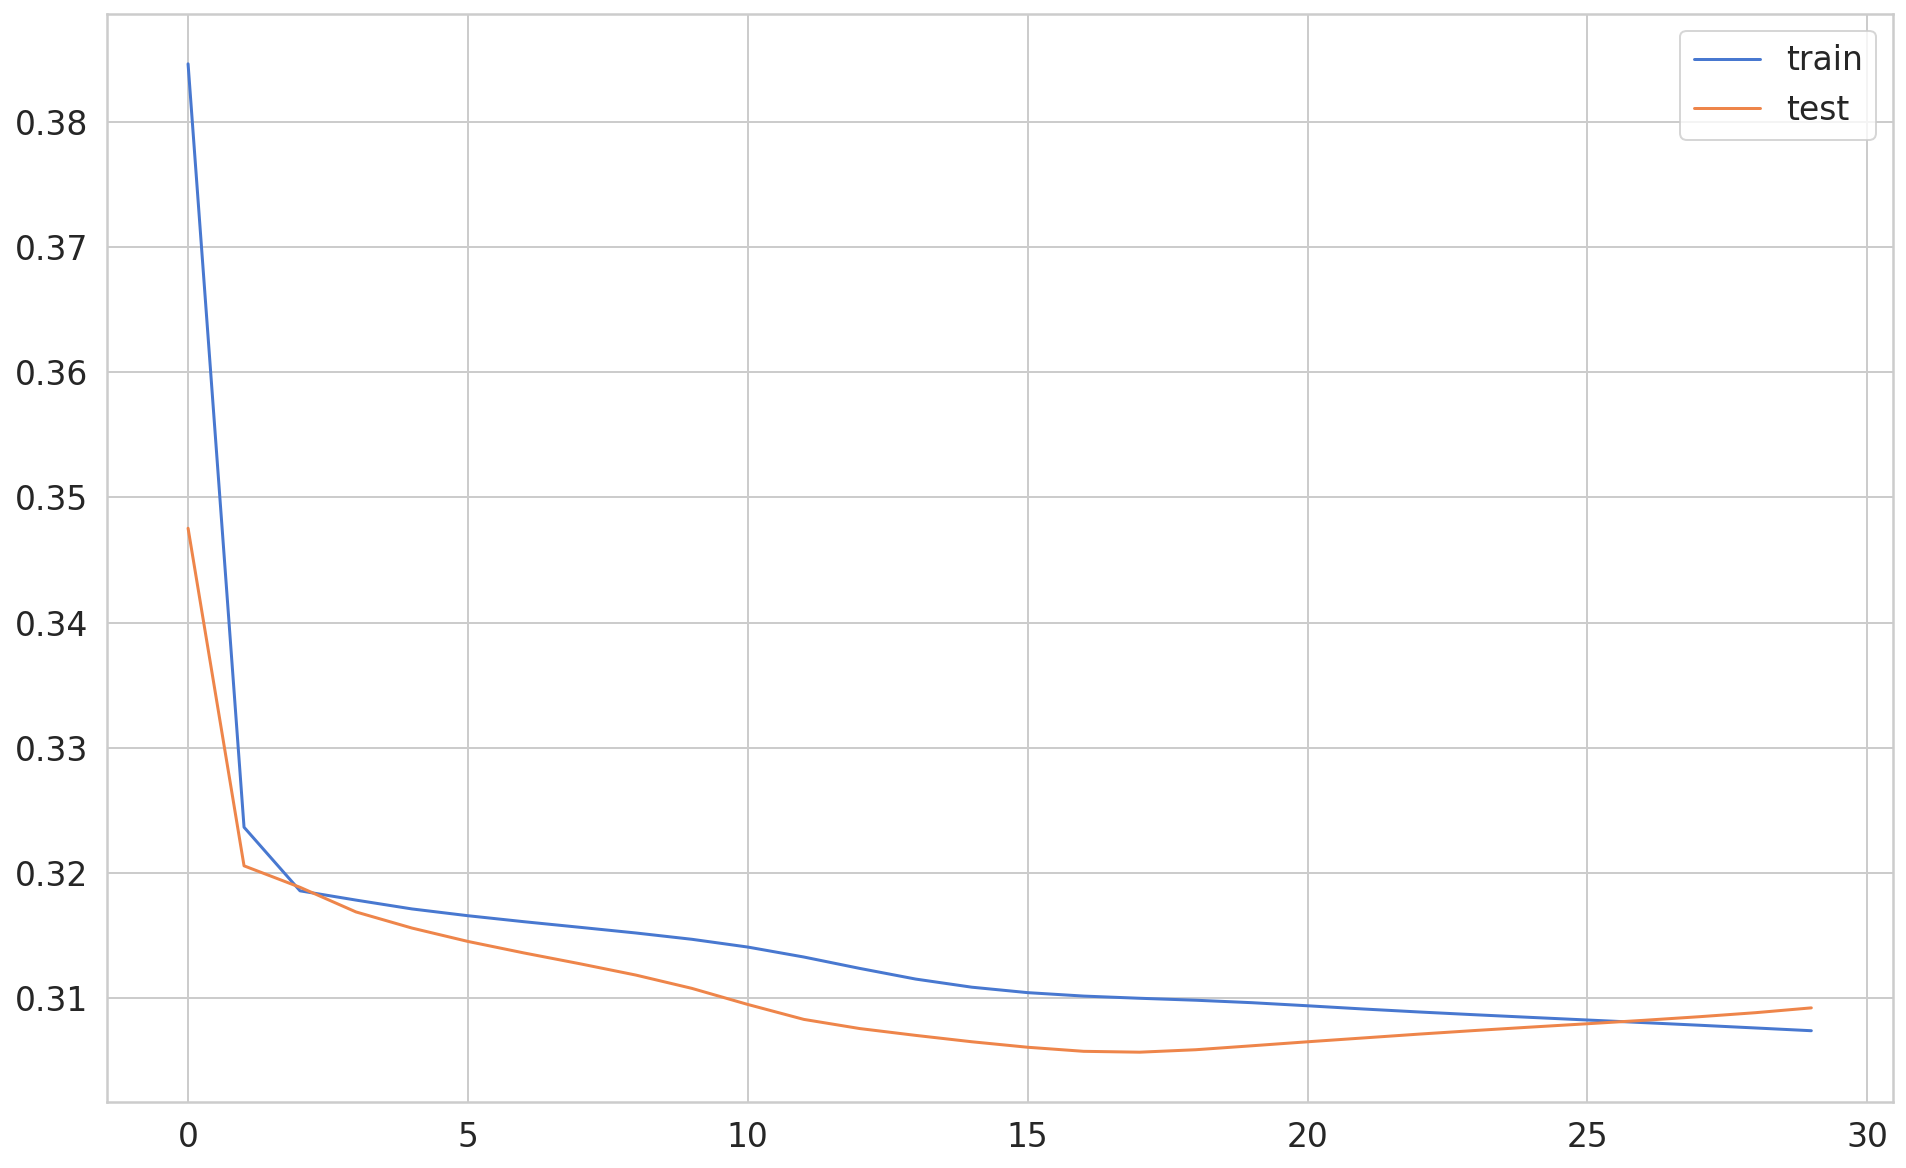

In [13]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [0]:
y_pred = model.predict(X_test)

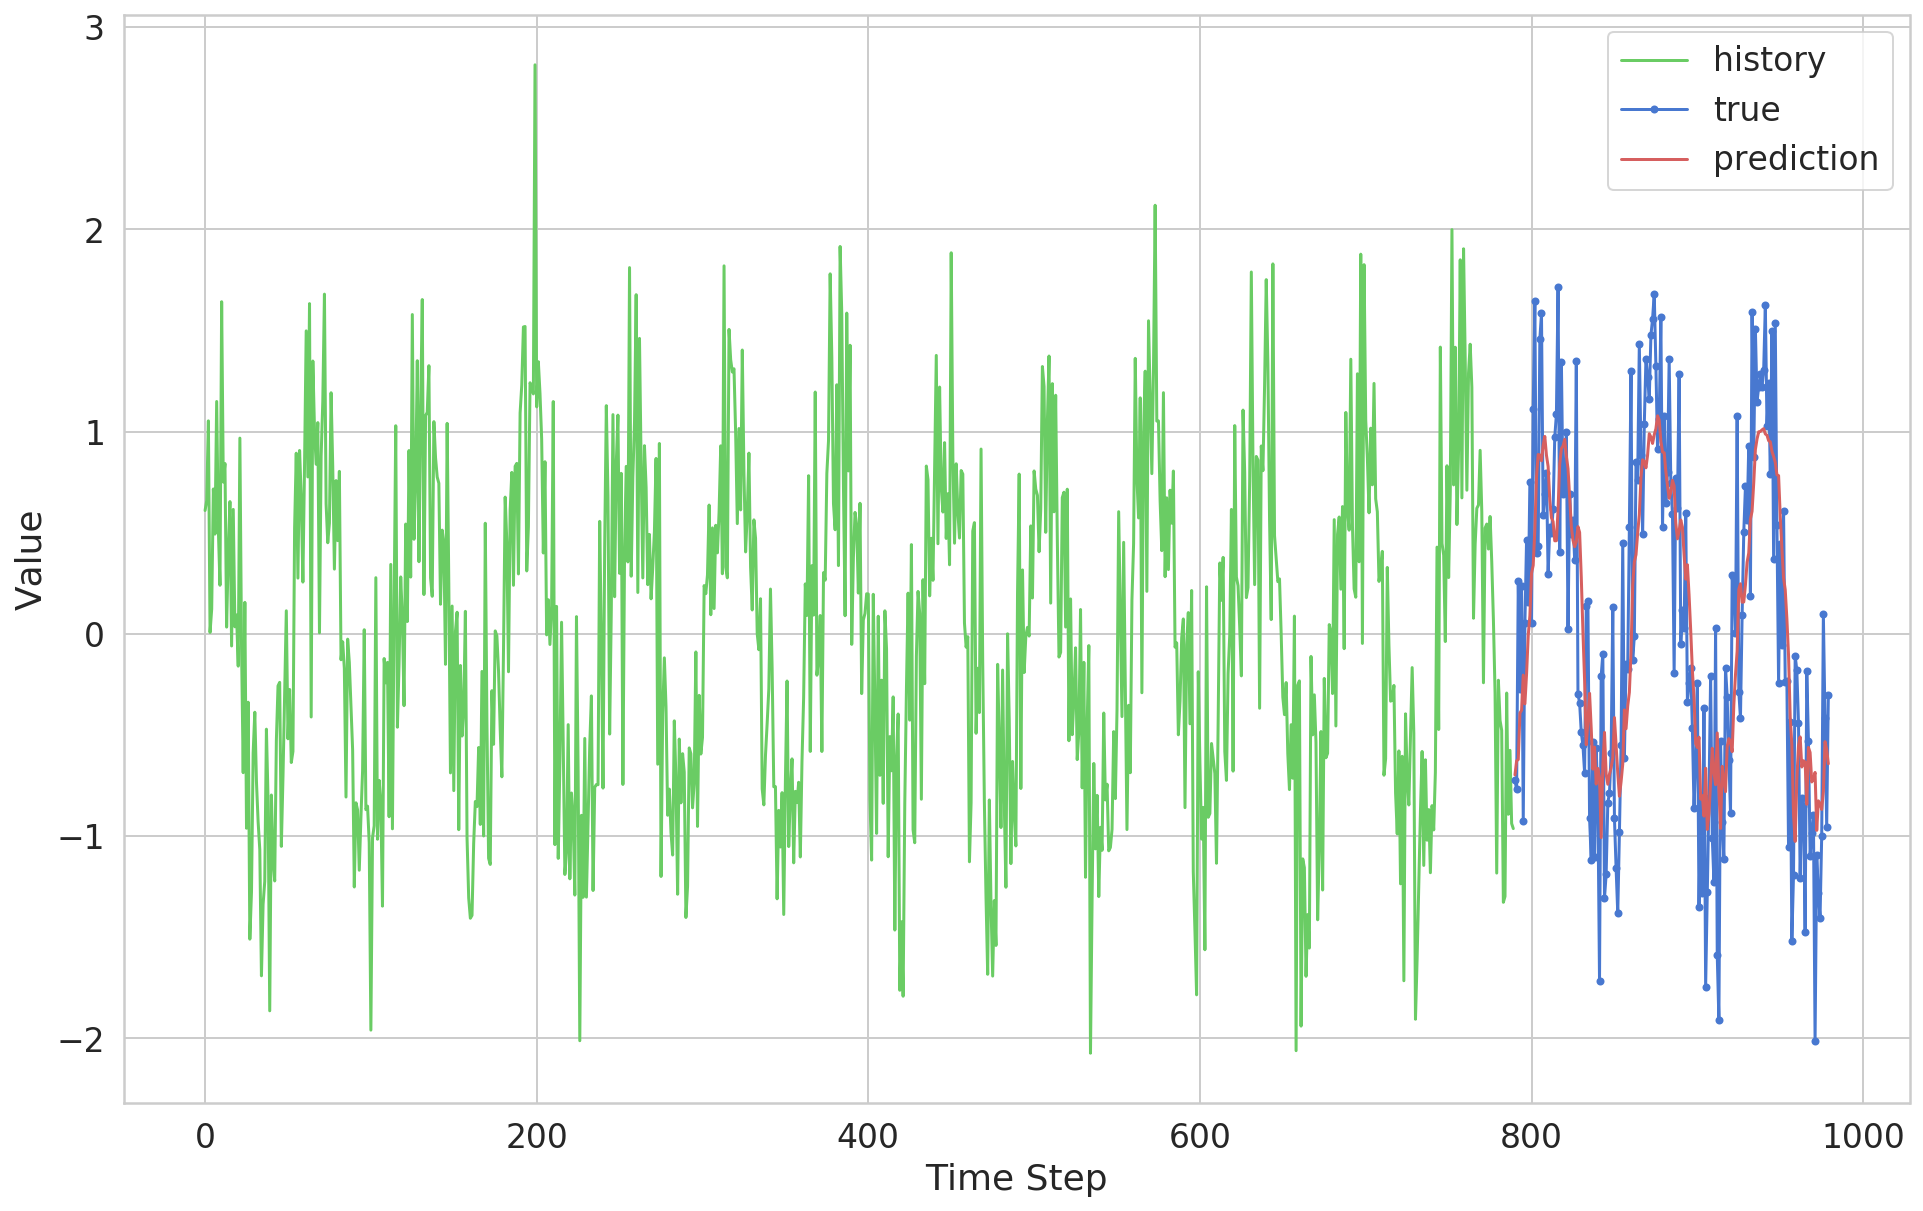

In [16]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

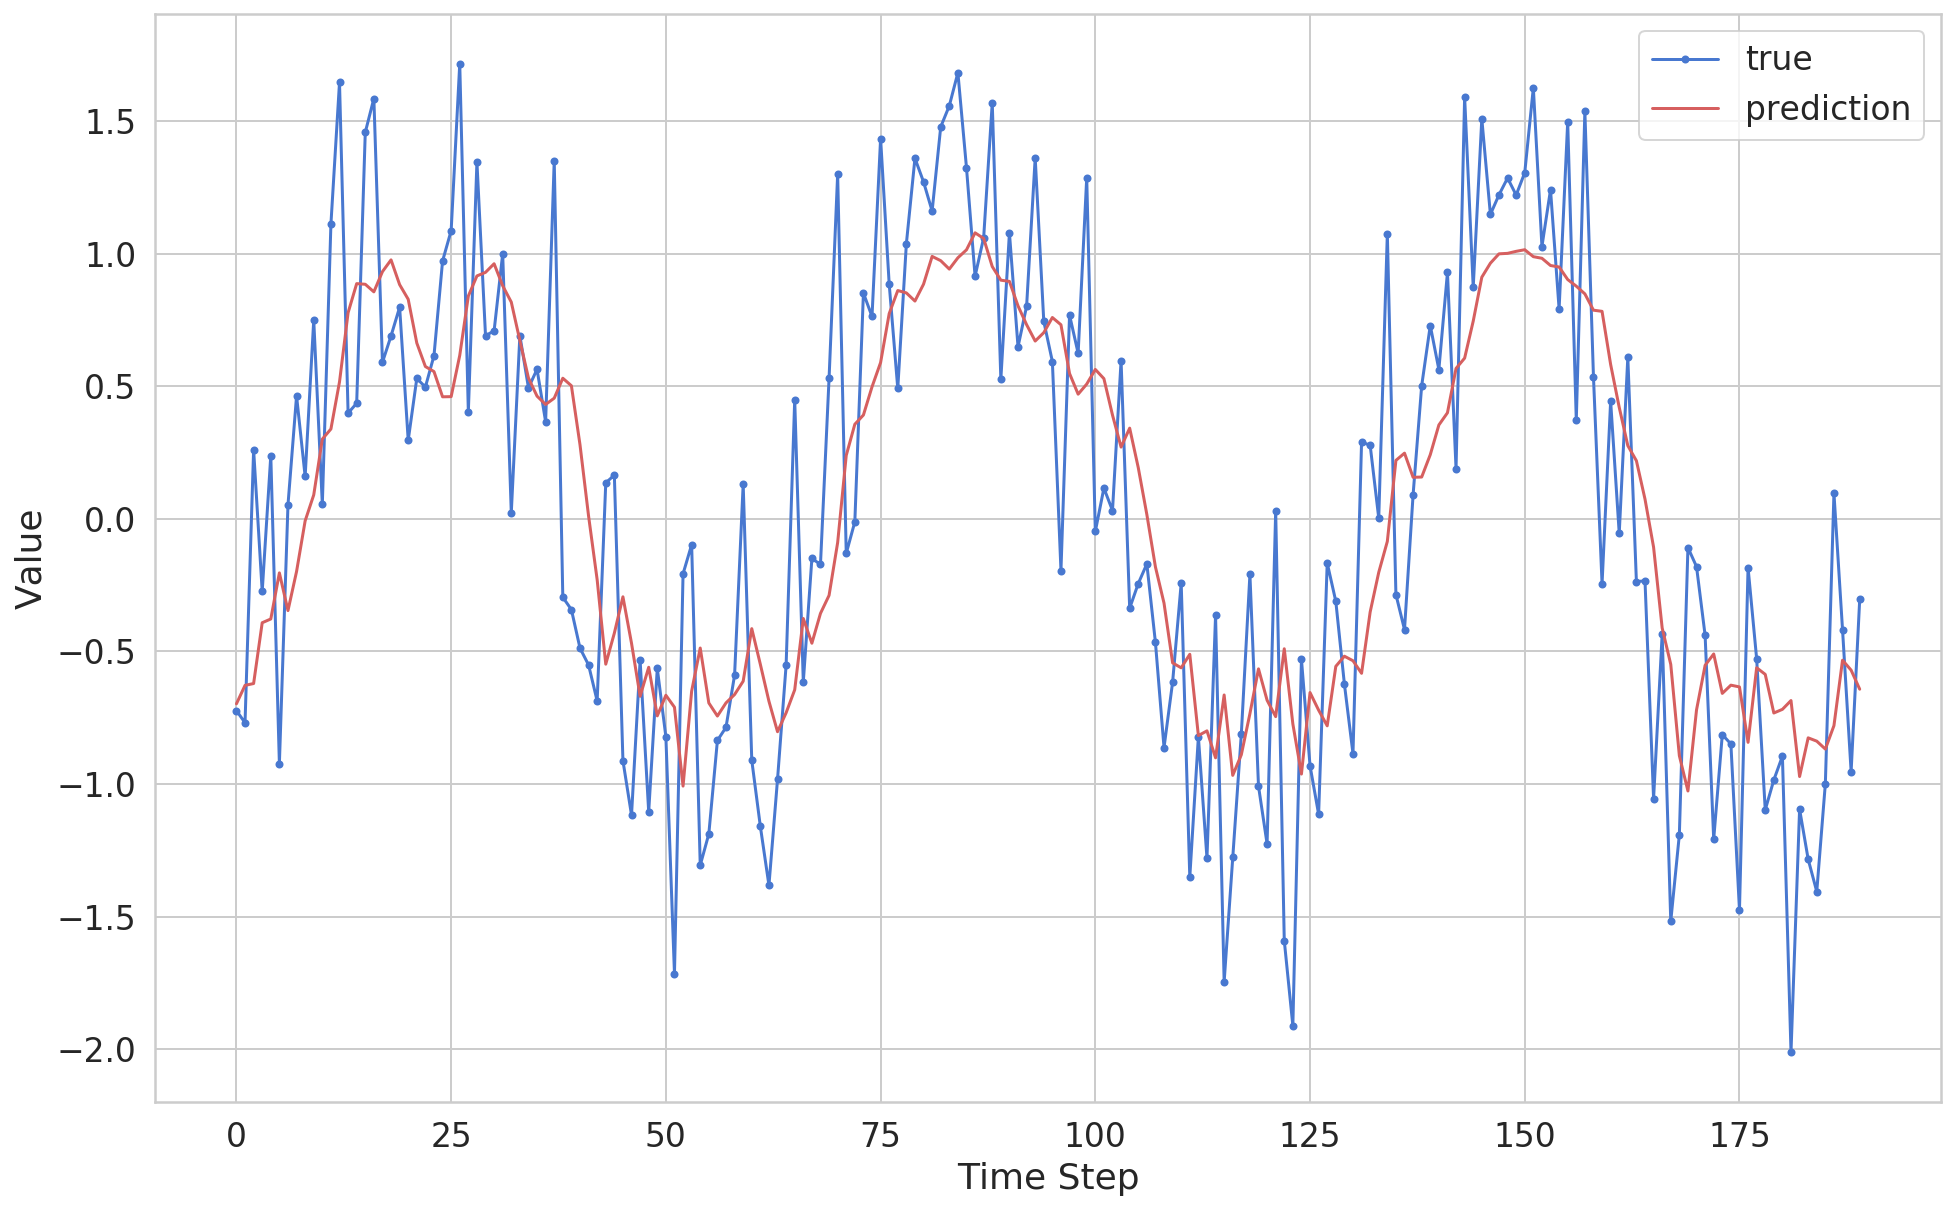

In [15]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [0]:

#delta = y_test.reshape(190,1) - y_pred

#print(y_test.tolist())
#print(y_pred.tolist())
#print(delta)


#plt.plot(y_test, marker='.', label="true")
#plt.plot(delta, 'r', label="prediction")
#plt.ylabel('Value')
#plt.xlabel('Time Step')
#plt.legend()
#plt.show();